In [44]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

import random

In [45]:
np.random.seed(0)

(60000, 28, 28)
(10000, 28, 28)


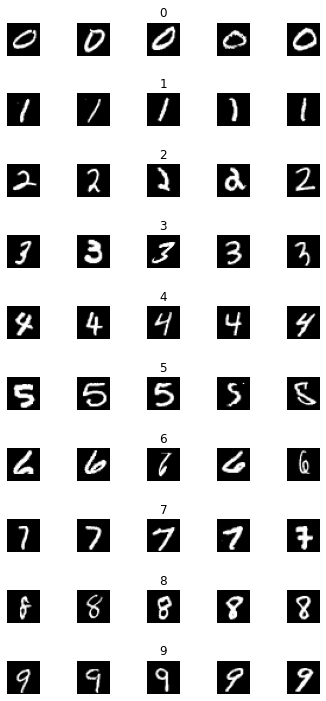

In [46]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


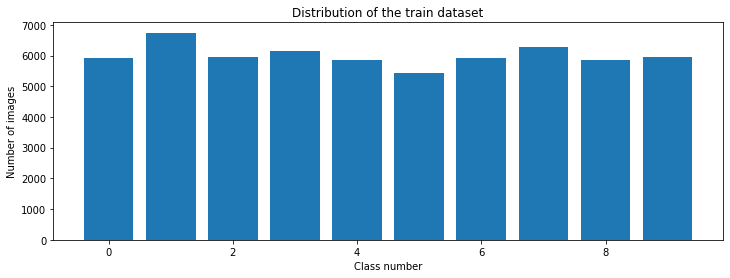

In [47]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [48]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [49]:
given_url = "https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg"

In [50]:
# LeNet model

def lenet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [51]:
model = lenet_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 375)               0         
                                                                 
 dense_4 (Dense)             (None, 500)              

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 2s 9ms/step - loss: 0.2599 - accuracy: 0.9188 - val_loss: 0.0587 - val_accuracy: 0.9837
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0438 - val_accuracy: 0.9867
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0474 - accuracy: 0.9864 - val_loss: 0.0446 - val_accuracy: 0.9878
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0319 - val_accuracy: 0.9902
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0366 - val_accuracy: 0.9895
Epoch 

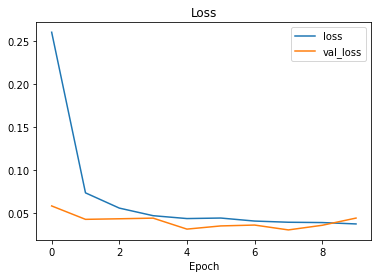

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()

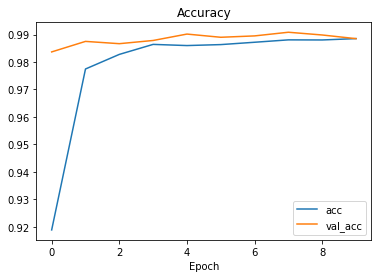

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [55]:
# Needed for upcoming video: 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

import requests

from PIL import Image

url = "https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg"

response = requests.get(url, stream=True)

img = Image.open(response.raw)

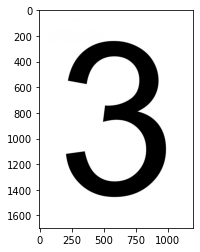

In [56]:
plt.imshow(img)
plt.show()

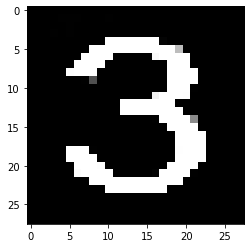

In [57]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))
plt.show()

In [58]:
image = image / 255
image = image.reshape(1, 28, 28, 1)


In [59]:
prediction = model.predict(image) 
predicted_class = np.argmax(prediction,axis=1)
print("predictied digit: ", str(predicted_class))

1/1 [==============================] - 0s 55ms/step
predictied digit:  [3]


In [60]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print("test score: ", score[0])
print("test accuracy: ", score[1])


<class 'list'>
test score:  0.04452923312783241
test accuracy:  0.988099992275238


In [65]:
layer1 = Model(model.layers[0].input, model.layers[0].output)
layer2 = Model(model.layers[0].input, model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 [==============================] - 0s 40ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


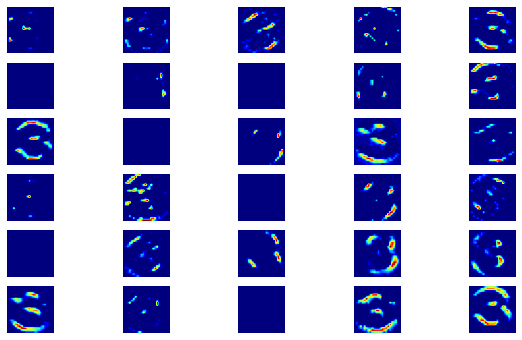

In [66]:
plt.figure(figsize = (10,6))
for i in range(30):
  plt.subplot(6, 5, i + 1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')


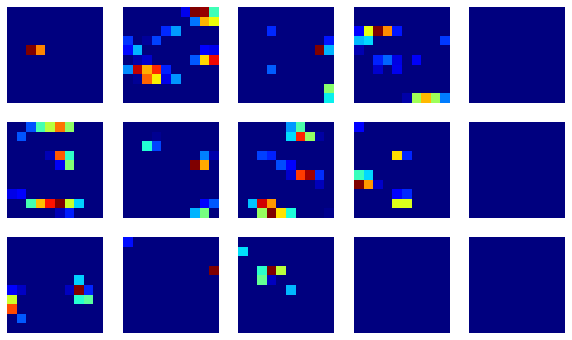

In [67]:
plt.figure(figsize = (10,6))
for i in range(15):
  plt.subplot(3, 5, i + 1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')